![title](images/graph.png)

In [1]:
import numpy as np
import tensorflow as tf

from keras import backend as K

#Clear TF memory
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

C:\Users\StrikeWade\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
np.random.seed(101)
tf.set_random_seed(101)
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [3]:
n_features = 10
n_dense_neurons = 3

x = tf.placeholder(dtype=tf.float32, shape=[None, n_features])

weight = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))
bias = tf.Variable(tf.ones([n_dense_neurons]))

init = tf.global_variables_initializer()

In [4]:
z = tf.add(tf.matmul(x,weight), bias)
a = tf.sigmoid(z)

In [5]:
with tf.Session() as sess:
    
    sess.run(init)
    layer_out = sess.run(a, feed_dict={x: np.random.random([1, n_features])})

In [6]:
layer_out

array([[0.76327866, 0.92031425, 0.34725502]], dtype=float32)

# Simple Regression example

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
x_data

array([ 1.02665824,  0.76592435,  2.37721976,  3.96494775,  4.970281  ,
        6.13924955,  6.19403697,  7.51494947,  8.10826179, 11.40650793])

In [19]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_label

array([-0.63432898,  0.05304595,  1.11024354,  4.66550148,  3.99874724,
        6.2562584 ,  7.90833525,  8.38074026,  8.55448271, 11.32677787])

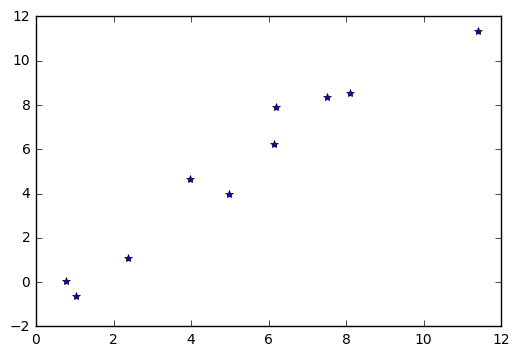

In [20]:
plt.plot(x_data, y_label, '*')


y = ax + b

In [23]:
a = tf.Variable(0.44)
b = tf.Variable(0.87)

In [24]:
error = 0

for x, y in zip(x_data, y_label):
    
    y_hat = a*x + b
    
    error += (y-y_hat)**2

In [28]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(error)

In [29]:
init = tf.global_variables_initializer()

In [30]:
with tf.Session() as sess:
    sess.run(init)
    
    steps = 100
    
    for i in range(steps):
        sess.run(optimizer)
        
    final_slope, final_intercept = sess.run([a, b])

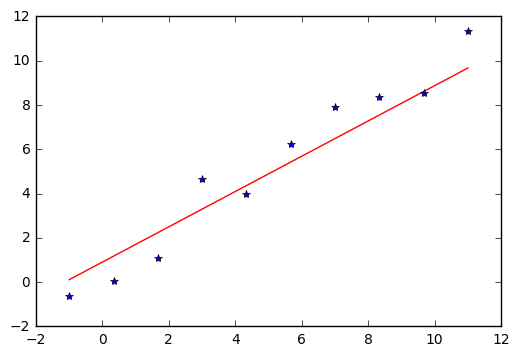

In [32]:
x_test = np.linspace(-1,11,10)

#y = ax + b
y_pred_plot = final_slope * x_test + final_intercept

plt.plot(x_test, y_pred_plot, 'r')
plt.plot(x_test, y_label, '*')